# Plotting with matplotlib

### Setup

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

### Getting the pop2014 DataFrame

In [2]:
csv ='../csvs/us-population-2010-2014.csv'
pops = pd.read_csv(csv, usecols=[0,1,5,6], thousands=',')
males = pops[pops.SEX == 'M'].POPESTIMATE2014
females = pops[pops.SEX == 'F'].POPESTIMATE2014

#Make sure Series are alignable
males.index = np.arange(0,len(males))
females.index = np.arange(0,len(females))

pop2014 = pd.concat([males, females], axis=1)
pop2014.columns = ['Males','Females']
pop2014['All'] = pop2014.Males + pop2014.Females
pop2014

,Males,Females,All
0,2017857,1930493,3948350
1,2023253,1938870,3962123
2,2022502,1935270,3957772
3,2048618,1956572,4005190
4,2043498,1959950,4003448
...,...,...,...
96,31235,89949,121184
97,20479,63252,83731
98,13649,46536,60185
99,9037,32791,41828


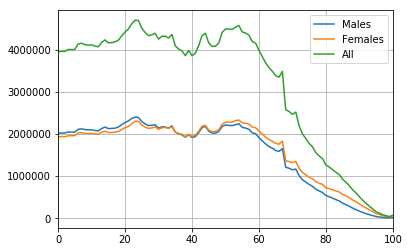

In [3]:
plot = pop2014.plot()
plot.grid(True)

#### Function to convert integer into comma-separated string

In [4]:
def comma(num):
    return "{:,}".format(num)

### Create a Line Plot

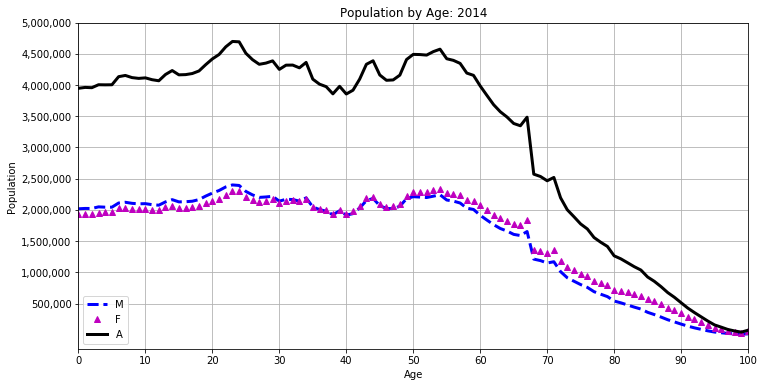

In [5]:
plt_pop2014 = pop2014.plot(title = "Population by Age: 2014",
                           style=['b--', 'm^', 'k-'],
                           figsize=(12,6),
                           lw = 3) 

plt_pop2014.set_xlabel('Age')
plt_pop2014.set_ylabel('Population')
plt_pop2014.legend(['M','F','A'], loc="lower left")
plt_pop2014.set_xticks(np.arange(0,101,10))
plt_pop2014.grid(True)

yticks = np.arange(500000,5000001,500000)
ytick_labels = pd.Series(yticks).apply(comma)

plt_pop2014.set_yticks(yticks)
plt_pop2014.set_yticklabels(ytick_labels);

### Create a Bar Plot

In [6]:
csv ='../csvs/mantle.csv'
mantle = pd.read_csv(csv, index_col='Year', usecols=[0,7,8,9])

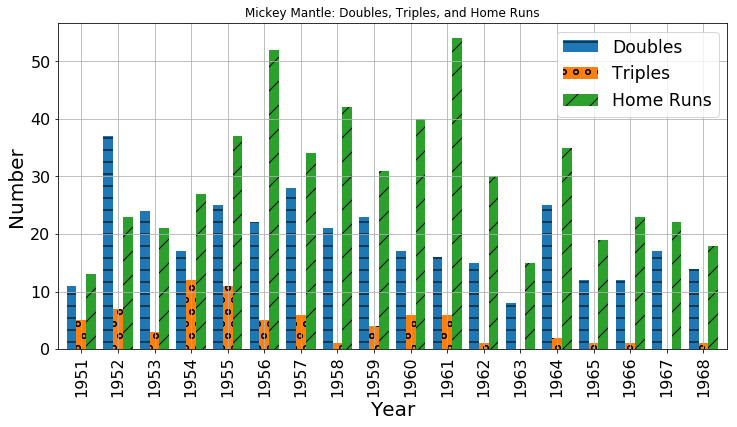

In [7]:
plt_mantle = mantle.plot(kind='bar',
                         title = 'Mickey Mantle: Doubles, Triples, and Home Runs',
                         figsize=(12,6),
                         width=.8,
                         fontsize=16)

plt_mantle.set_ylabel('Number', fontsize=20)
plt_mantle.set_xlabel('Year', fontsize=20)
plt_mantle.grid(True)

bars = plt_mantle.patches

for i in np.arange(0,18):
    bars[i].set_hatch('-')
for i in np.arange(18,36):
    bars[i].set_hatch('o')
for i in np.arange(36,54):
    bars[i].set_hatch('/')
    
plt_mantle.legend(['Doubles','Triples','Home Runs'],
                  loc="upper right", fontsize='xx-large');